In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input\Alzheimer Disease and Healthy Aging Data In US.csv


In [23]:
file_path = 'input/Alzheimer Disease and Healthy Aging Data In US.csv'
data = pd.read_csv(file_path)
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

3. 数据分析要求
3.1 数据摘要和可视化
数据摘要
      标称属性，给出每个可能取值的频数

      数值属性，给出5数概括及缺失值的个数

数据可视化
      使用直方图、盒图等检查数据分布及离群点

In [14]:
Nominal_Attribute = ['LocationAbbr', 'LocationDesc', 'Class', 'Topic',
                         'Question', 'DataValueTypeID', 'Stratification1',
                         'StratificationCategory2', 'ClassID', 'QuestionID',
                         'StratificationCategoryID2', 'StratificationID2']
print('标称属性:')
for attribute in Nominal_Attribute:
    print('-------------------------------------------------')
    print(attribute + ":")
    print(data[attribute].value_counts())

标称属性:
-------------------------------------------------
LocationAbbr:
LocationAbbr
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: count, dtype: int64
-------------------------------------------------
LocationDesc:
LocationDesc
United States, DC & Territories    4644
West   

In [16]:
def five_number(data):
    Min_num = min(data)
    Max_num = max(data)
    Q1_num = np.percentile(data, 25)
    Median_num = np.median(data)
    Q3_num = np.percentile(data, 75)
    return Min_num, Max_num, Q1_num, Median_num, Q3_num

print('数值属性:')

for attribute in Number_Attribute:
    print('-------------------------------------------------')
    print(attribute + ":")
    print('缺失值个数：')
    print(data[attribute].isnull().sum())
    print('五值概括:')
    print(five_number(data.dropna(subset=[attribute])[attribute]))

数值属性:
-------------------------------------------------
YearStart:
缺失值个数：
0
五值概括:
(2015, 2020, 2016.0, 2017.0, 2019.0)
-------------------------------------------------
YearEnd:
缺失值个数：
0
五值概括:
(2015, 2020, 2016.0, 2018.0, 2019.0)
-------------------------------------------------
Data_Value:
缺失值个数：
69833
五值概括:
(0.0, 100.0, 15.3, 32.5, 56.8)
-------------------------------------------------
Data_Value_Alt:
缺失值个数：
69833
五值概括:
(0.0, 100.0, 15.3, 32.5, 56.8)
-------------------------------------------------
LocationID:
缺失值个数：
0
五值概括:
(1, 9004, 18.0, 33.0, 49.0)


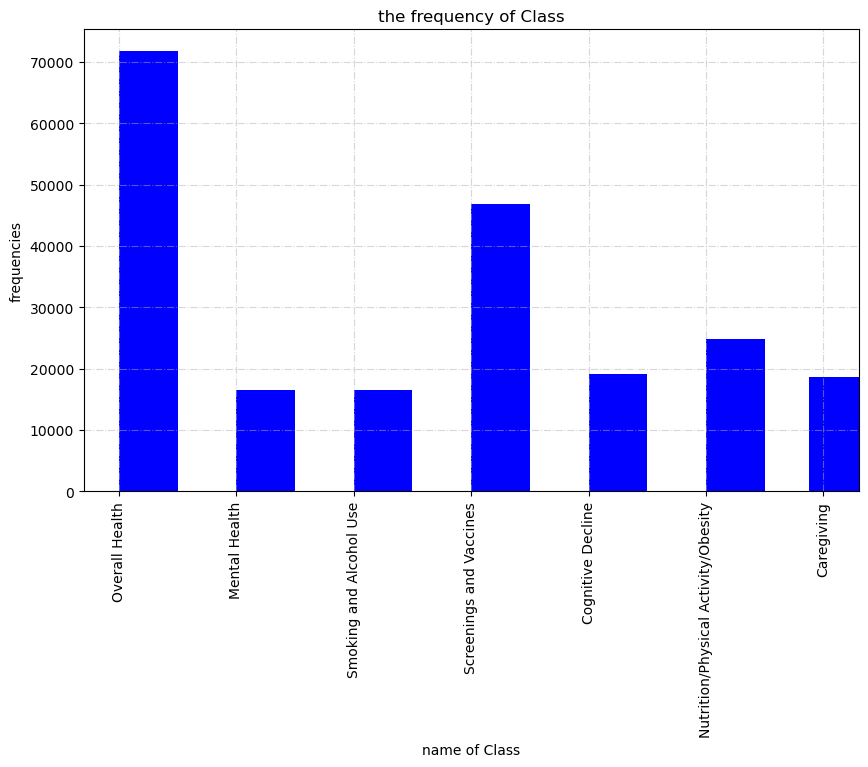

In [17]:
# histogram
# Class
plt.figure(num=1, figsize=(10,6))
sub_data = data.dropna(subset=['Class'])['Class']
plt.xticks(rotation=90)
plt.hist(sub_data, bins=48, width=0.5, color='blue')
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('name of Class')
plt.ylabel('frequencies')
plt.title(r'the frequency of Class')
plt.show()

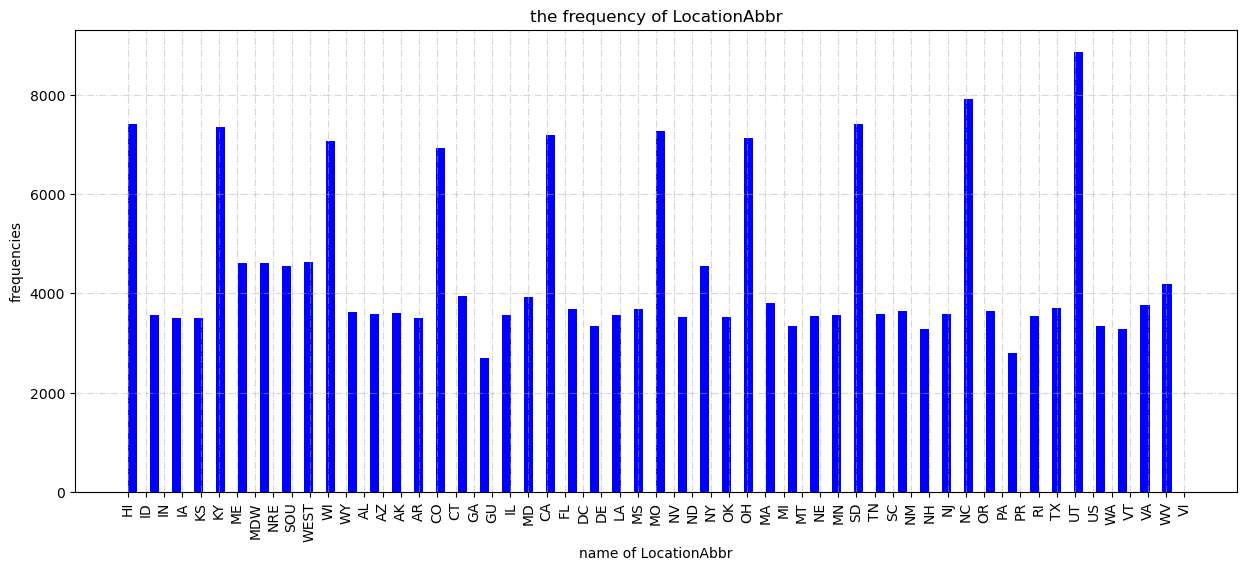

In [18]:
# LocationAbbr
plt.figure(num=2, figsize=(15,6))
sub_data = data.dropna(subset=['LocationAbbr'])['LocationAbbr']
plt.xticks(rotation=90)
plt.hist(sub_data, bins=48, width=0.5, color='blue')
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('name of LocationAbbr')
plt.ylabel('frequencies')
plt.title(r'the frequency of LocationAbbr')
plt.show()

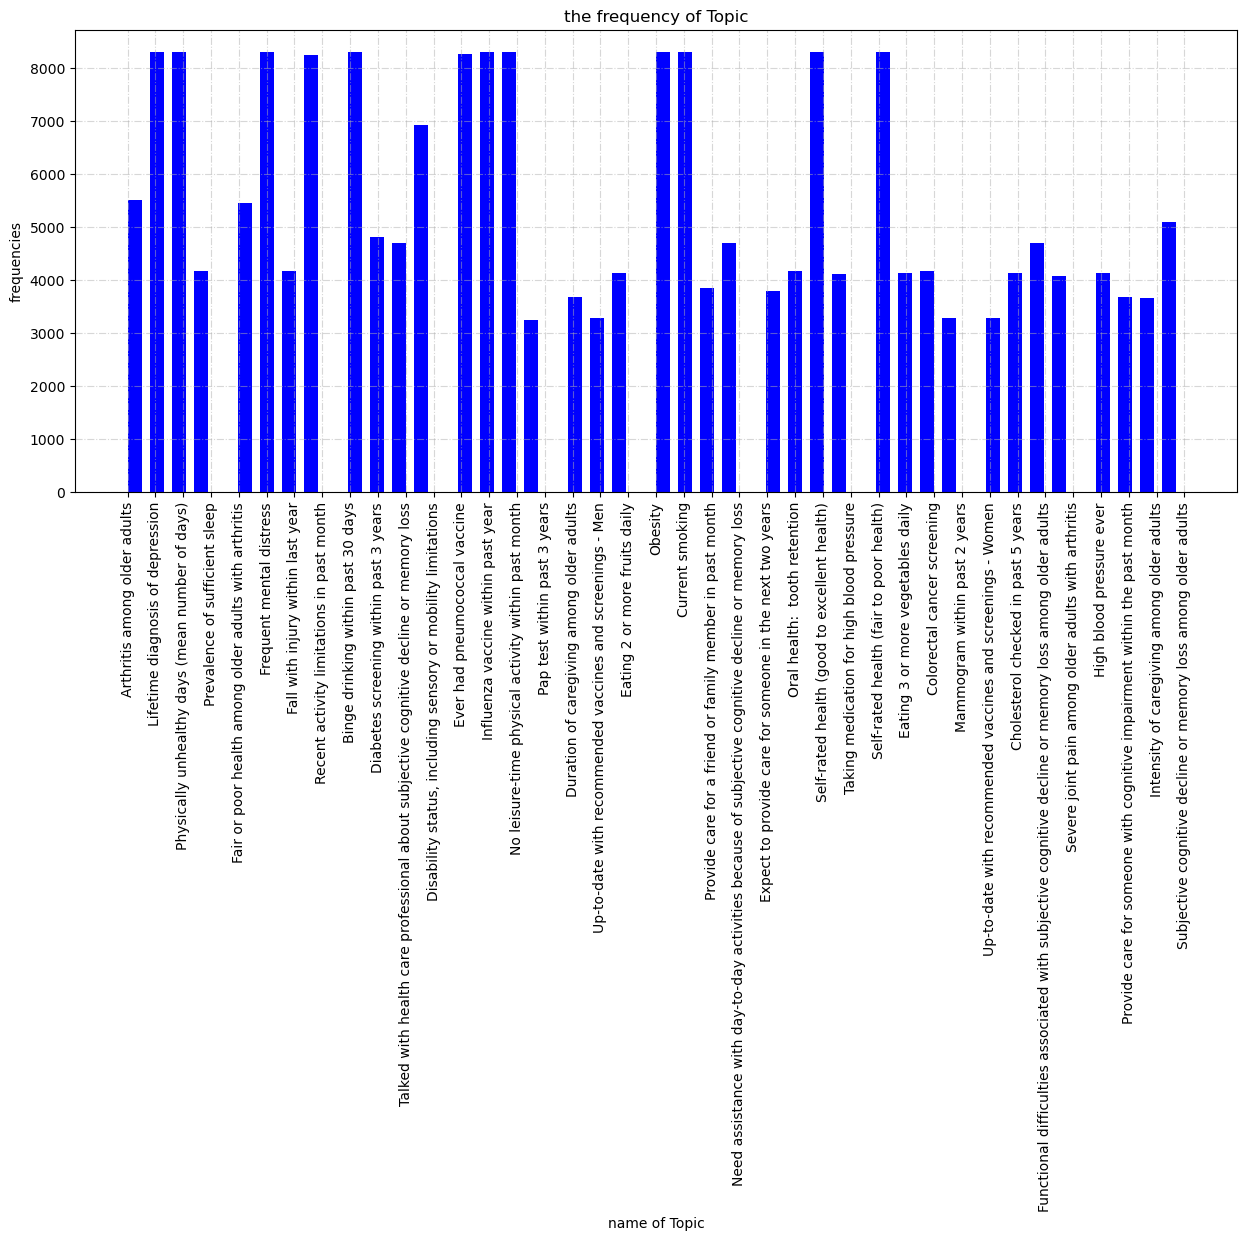

In [19]:
# Topic
plt.figure(num=3, figsize=(15,6))
sub_data = data.dropna(subset=['Topic'])['Topic']
plt.xticks(rotation=90)
plt.hist(sub_data, bins=48, width=0.5, color='blue')
plt.grid(alpha=0.5, linestyle='-.')
plt.xlabel('name of Topic')
plt.ylabel('frequencies')
plt.title(r'the frequency of Topic')
plt.show()

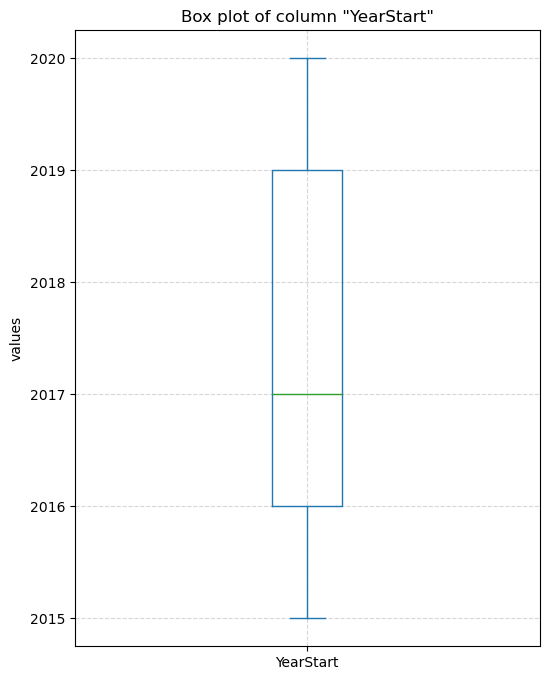

In [20]:
# box-plot picture
# YearStart
plt.figure(num=4, figsize=(6, 8))
sub_data = data.dropna(subset=['YearStart'])['YearStart']
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "YearStart"')
plt.show()

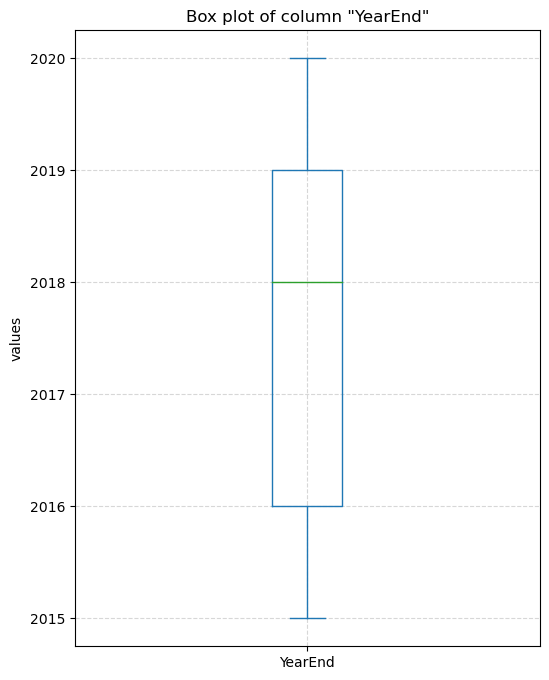

In [21]:
# YearEnd
plt.figure(num=5, figsize=(6, 8))
sub_data = data.dropna(subset=['YearEnd'])['YearEnd']
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "YearEnd"')
plt.show()

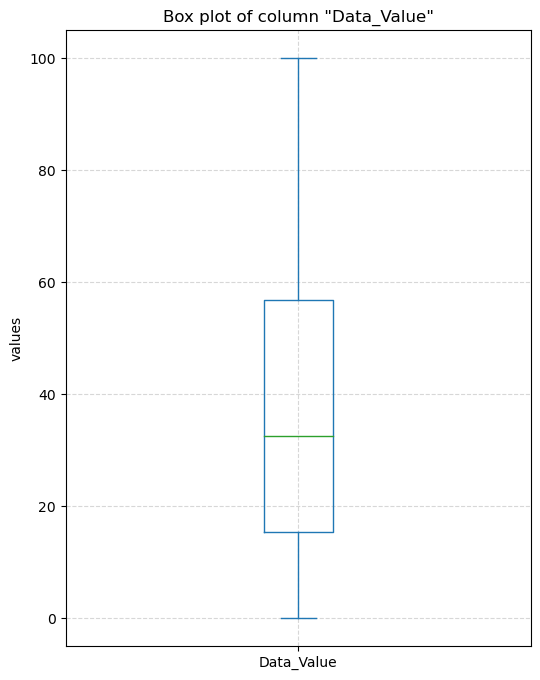

In [22]:
# Data_Value
plt.figure(num=6, figsize=(6, 8))
sub_data = data.dropna(subset=['Data_Value'])['Data_Value']
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "Data_Value"')
plt.show()

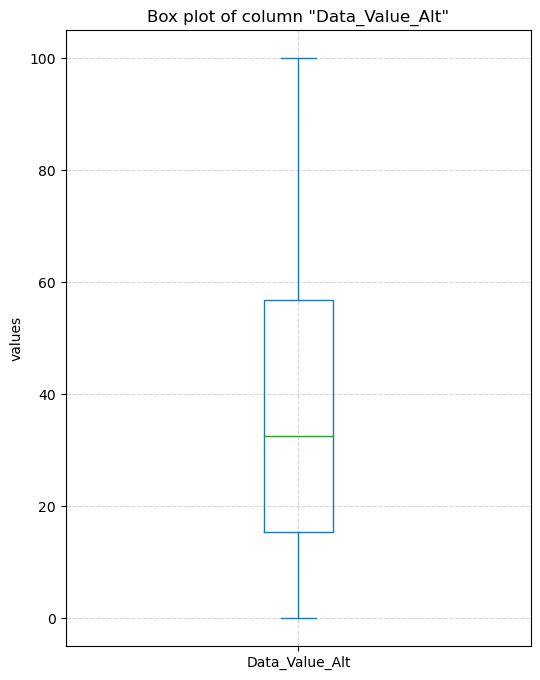

In [24]:
# Data_Value_Alt
plt.figure(num=7, figsize=(6, 8))
sub_data = data.dropna(subset=['Data_Value_Alt'])['Data_Value_Alt']
sub_data.plot.box(title='box plot')
plt.grid(linestyle="--", alpha=0.5)
plt.ylabel('values')
plt.title(r'Box plot of column "Data_Value_Alt"')
plt.show()

3.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

将缺失部分剔除
用最高频率值来填补缺失值
通过属性的相关关系来填补缺失值
通过数据对象之间的相似性来填补缺失值
注意：在处理后完成，要对比新旧数据集的差异。

In [51]:
# 缺失数据处理
print('缺失数据列表：')
data[data[['Data_Value']].isnull().T.any()].iloc[:10,10:]

缺失数据列表：


,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
32,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-111.7638113 34.86597028),C01,TOC13,Q45,4,AGE,65PLUS,RACE,NAA
33,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,65PLUS,RACE,NAA
42,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC03,Q20,1,AGE,AGE_OVERALL,RACE,HIS
47,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C02,TNC01,Q01,1,AGE,5064,RACE,HIS
48,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC09,Q09,1,AGE,AGE_OVERALL,RACE,HIS
49,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Hispanic,POINT (-147.722059 64.84507996),C02,TNC04,Q13,2,AGE,65PLUS,RACE,HIS
63,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C02,TNC01,Q01,4,AGE,5064,RACE,ASN
64,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C01,TOC04,Q04,1,AGE,AGE_OVERALL,RACE,NAA
66,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Asian/Pacific Islander,POINT (-86.63186076 32.84057112),C01,TOC07,Q32,1,AGE,AGE_OVERALL,RACE,ASN
67,Percentage,NaN,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C03,TSC09,Q09,4,AGE,5064,RACE,ASN


In [56]:
# 对缺失部分进行剔除
data1 = data.copy(deep=True)
data1 = data1.dropna()
print('剔除数据列表：')
data1[data[['Data_Value']].isnull().T.any()].iloc[:10,10:]

剔除数据列表：


,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2


In [53]:
# 用最高频率值来填补缺失值
data2 = data.copy(deep=True)
data2['Data_Value'] = data2['Data_Value'].fillna(np.median(data2.dropna(subset=['Data_Value'])['Data_Value']),inplace=False)
print('填充后的缺失数据列表：')
data2[data[['Data_Value']].isnull().T.any()].iloc[:10,10:]

填充后的缺失数据列表：


,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
32,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-111.7638113 34.86597028),C01,TOC13,Q45,4,AGE,65PLUS,RACE,NAA
33,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,65PLUS,RACE,NAA
42,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC03,Q20,1,AGE,AGE_OVERALL,RACE,HIS
47,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C02,TNC01,Q01,1,AGE,5064,RACE,HIS
48,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC09,Q09,1,AGE,AGE_OVERALL,RACE,HIS
49,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Hispanic,POINT (-147.722059 64.84507996),C02,TNC04,Q13,2,AGE,65PLUS,RACE,HIS
63,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C02,TNC01,Q01,4,AGE,5064,RACE,ASN
64,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C01,TOC04,Q04,1,AGE,AGE_OVERALL,RACE,NAA
66,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Asian/Pacific Islander,POINT (-86.63186076 32.84057112),C01,TOC07,Q32,1,AGE,AGE_OVERALL,RACE,ASN
67,Percentage,32.5,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C03,TSC09,Q09,4,AGE,5064,RACE,ASN


In [57]:
# 通过属性的相关关系来填补缺失值
data3 = data.copy(deep=True)
data3['Data_Value'] = data3['Data_Value'].interpolate()
print('处理后的缺失数据列表：')
data3[data[['Data_Value']].isnull().T.any()].iloc[:10, 10:]

处理后的缺失数据列表：


,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
32,Percentage,60.333333,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-111.7638113 34.86597028),C01,TOC13,Q45,4,AGE,65PLUS,RACE,NAA
33,Percentage,52.166667,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,65PLUS,RACE,NAA
42,Percentage,36.300000,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC03,Q20,1,AGE,AGE_OVERALL,RACE,HIS
47,Percentage,36.475000,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C02,TNC01,Q01,1,AGE,5064,RACE,HIS
48,Percentage,31.450000,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC09,Q09,1,AGE,AGE_OVERALL,RACE,HIS
49,Percentage,26.425000,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Hispanic,POINT (-147.722059 64.84507996),C02,TNC04,Q13,2,AGE,65PLUS,RACE,HIS
63,Percentage,26.366667,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C02,TNC01,Q01,4,AGE,5064,RACE,ASN
64,Percentage,46.033333,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C01,TOC04,Q04,1,AGE,AGE_OVERALL,RACE,NAA
66,Percentage,61.666667,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Asian/Pacific Islander,POINT (-86.63186076 32.84057112),C01,TOC07,Q32,1,AGE,AGE_OVERALL,RACE,ASN
67,Percentage,57.633333,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C03,TSC09,Q09,4,AGE,5064,RACE,ASN


In [58]:
# 通过数据对象之间的相似性来填补缺失值
data4 = data.copy(deep=True)
data4['Data_Value'] = data4['Data_Value'].fillna(np.mean(data4['Data_Value']),inplace=False)
print('处理后的缺失数据列表: ')
data4[data[['Data_Value']].isnull().T.any()].iloc[:10,10:]

处理后的缺失数据列表: 


,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
32,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-111.7638113 34.86597028),C01,TOC13,Q45,4,AGE,65PLUS,RACE,NAA
33,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C06,TCC04,Q42,1,AGE,65PLUS,RACE,NAA
42,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC03,Q20,1,AGE,AGE_OVERALL,RACE,HIS
47,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C02,TNC01,Q01,1,AGE,5064,RACE,HIS
48,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Hispanic,POINT (-86.63186076 32.84057112),C03,TSC09,Q09,1,AGE,AGE_OVERALL,RACE,HIS
49,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,65 years or older,Race/Ethnicity,Hispanic,POINT (-147.722059 64.84507996),C02,TNC04,Q13,2,AGE,65PLUS,RACE,HIS
63,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C02,TNC01,Q01,4,AGE,5064,RACE,ASN
64,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Native Am/Alaskan Native,POINT (-86.63186076 32.84057112),C01,TOC04,Q04,1,AGE,AGE_OVERALL,RACE,NAA
66,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,Overall,Race/Ethnicity,Asian/Pacific Islander,POINT (-86.63186076 32.84057112),C01,TOC07,Q32,1,AGE,AGE_OVERALL,RACE,ASN
67,Percentage,37.341956,NaN,NaN,NaN,NaN,Age Group,50-64 years,Race/Ethnicity,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C03,TSC09,Q09,4,AGE,5064,RACE,ASN
